In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns
import plotly.graph_objects as go

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [2]:
df = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/Test/Sim 11_summary.csv', header=0)

In [3]:
df

,strength,pa,num_images,pos_rms,mag_rms,t_mpole_str,t_mpole_pa,chi2,"$z_{s,fid}$",x,y,e,$θ_{e}$,$r_{Ein}$,$\gamma$ (PWI)
0,0.001,0.00000,1,0.037397,1.180186e+06,0.001,0.00000,586.9263,1.0,20.80817,20.77563,8.339009e-08,91.696390,0.488052,1.519078
1,0.001,0.36036,1,0.029686,1.018789e+06,0.001,0.36036,586.9963,1.0,20.80787,20.77560,2.629448e-07,84.107870,0.488147,1.504533
2,0.001,0.72072,1,0.035903,1.131140e+06,0.001,0.72072,587.1568,1.0,20.80798,20.77552,1.370689e-07,82.437350,0.488187,1.514440
3,0.001,1.08108,0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.0,0.00000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
4,0.001,1.44144,0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.0,0.00000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.100,358.55856,4,0.007207,2.610500e+00,0.100,358.55860,258.8953,1.0,20.81034,20.79561,2.261408e-01,-4.180195,0.491550,2.187801
999996,0.100,358.91892,4,0.007228,3.426125e+00,0.100,358.91890,262.6737,1.0,20.80958,20.78990,2.889964e-01,-4.171813,0.493174,2.293088
999997,0.100,359.27928,4,0.007304,2.630250e+00,0.100,359.27930,266.4822,1.0,20.80977,20.79409,2.408789e-01,-4.168573,0.491959,2.216707
999998,0.100,359.63964,4,0.007351,3.586275e+00,0.100,359.63960,268.7272,1.0,20.81022,20.80228,1.701748e-01,-4.110965,0.489955,2.063648


In [4]:
# Fill missing values in pos_rms column with 1
df['pos_rms'] = df['pos_rms'].fillna(1)
df['mag_rms'] = df['mag_rms'].fillna(6000)

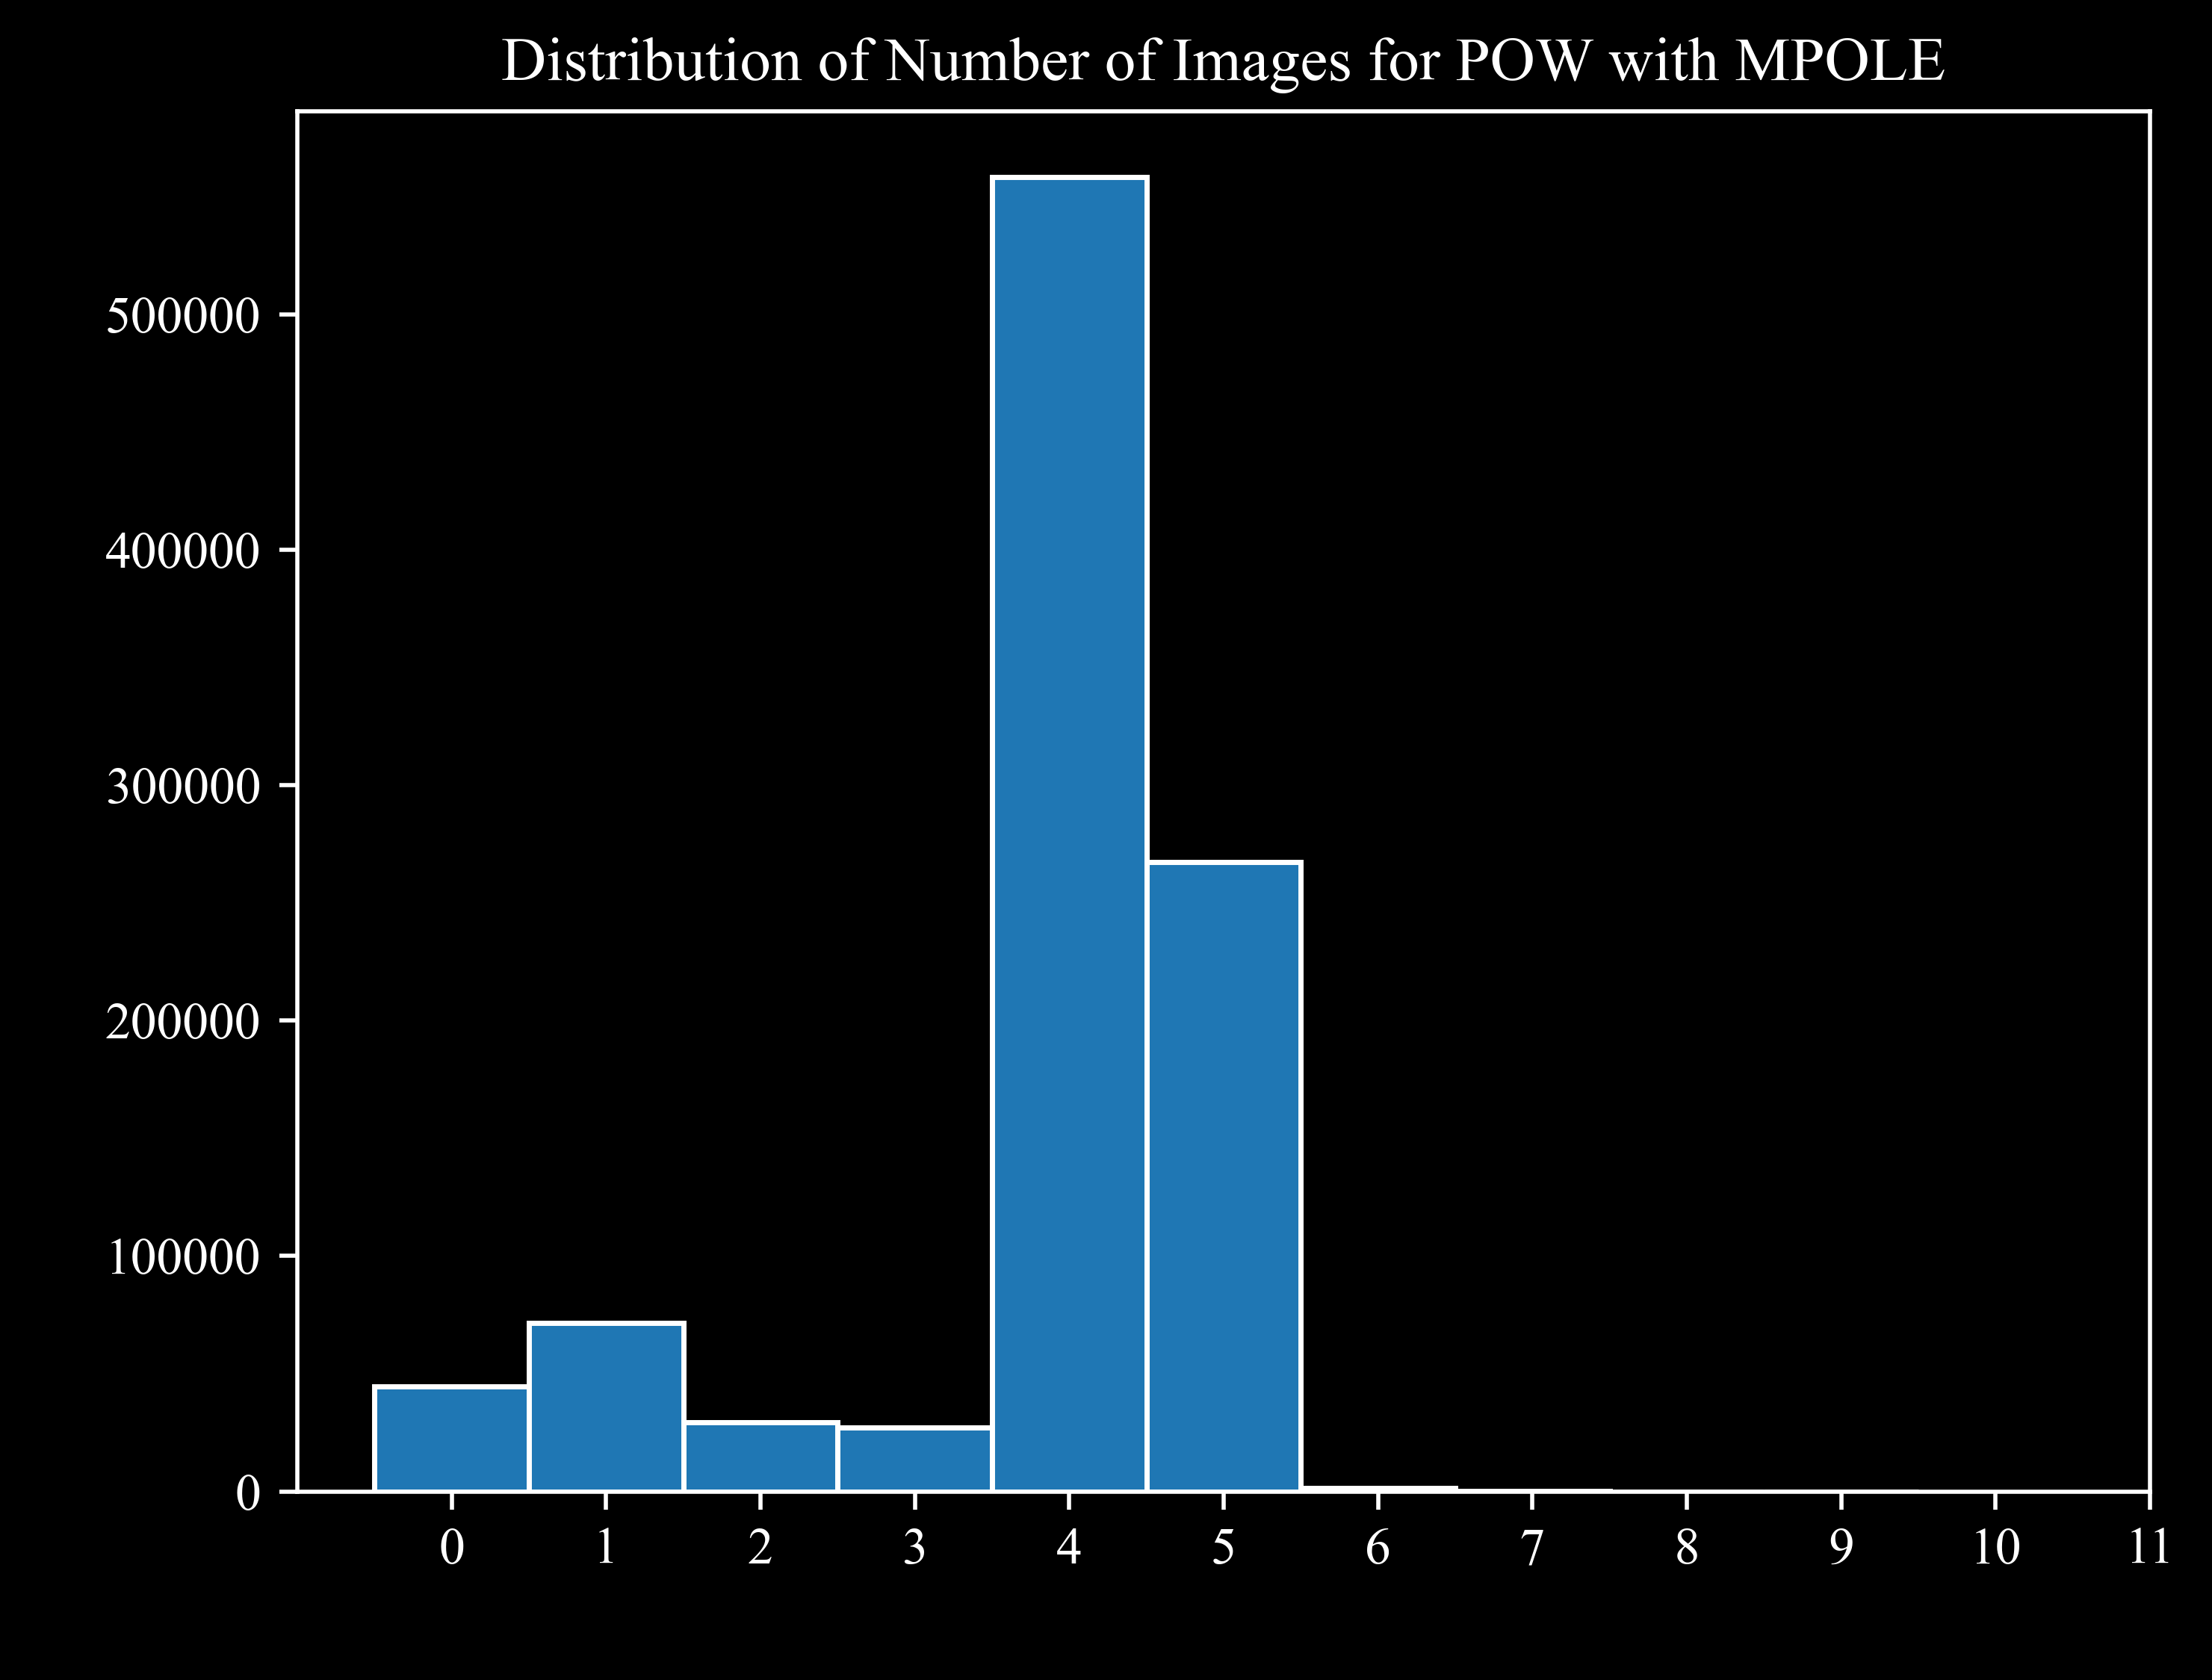

In [7]:
plt.hist(df['num_images'], bins=range(0, 11), align='left', edgecolor='w')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images for POW with MPOLE')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

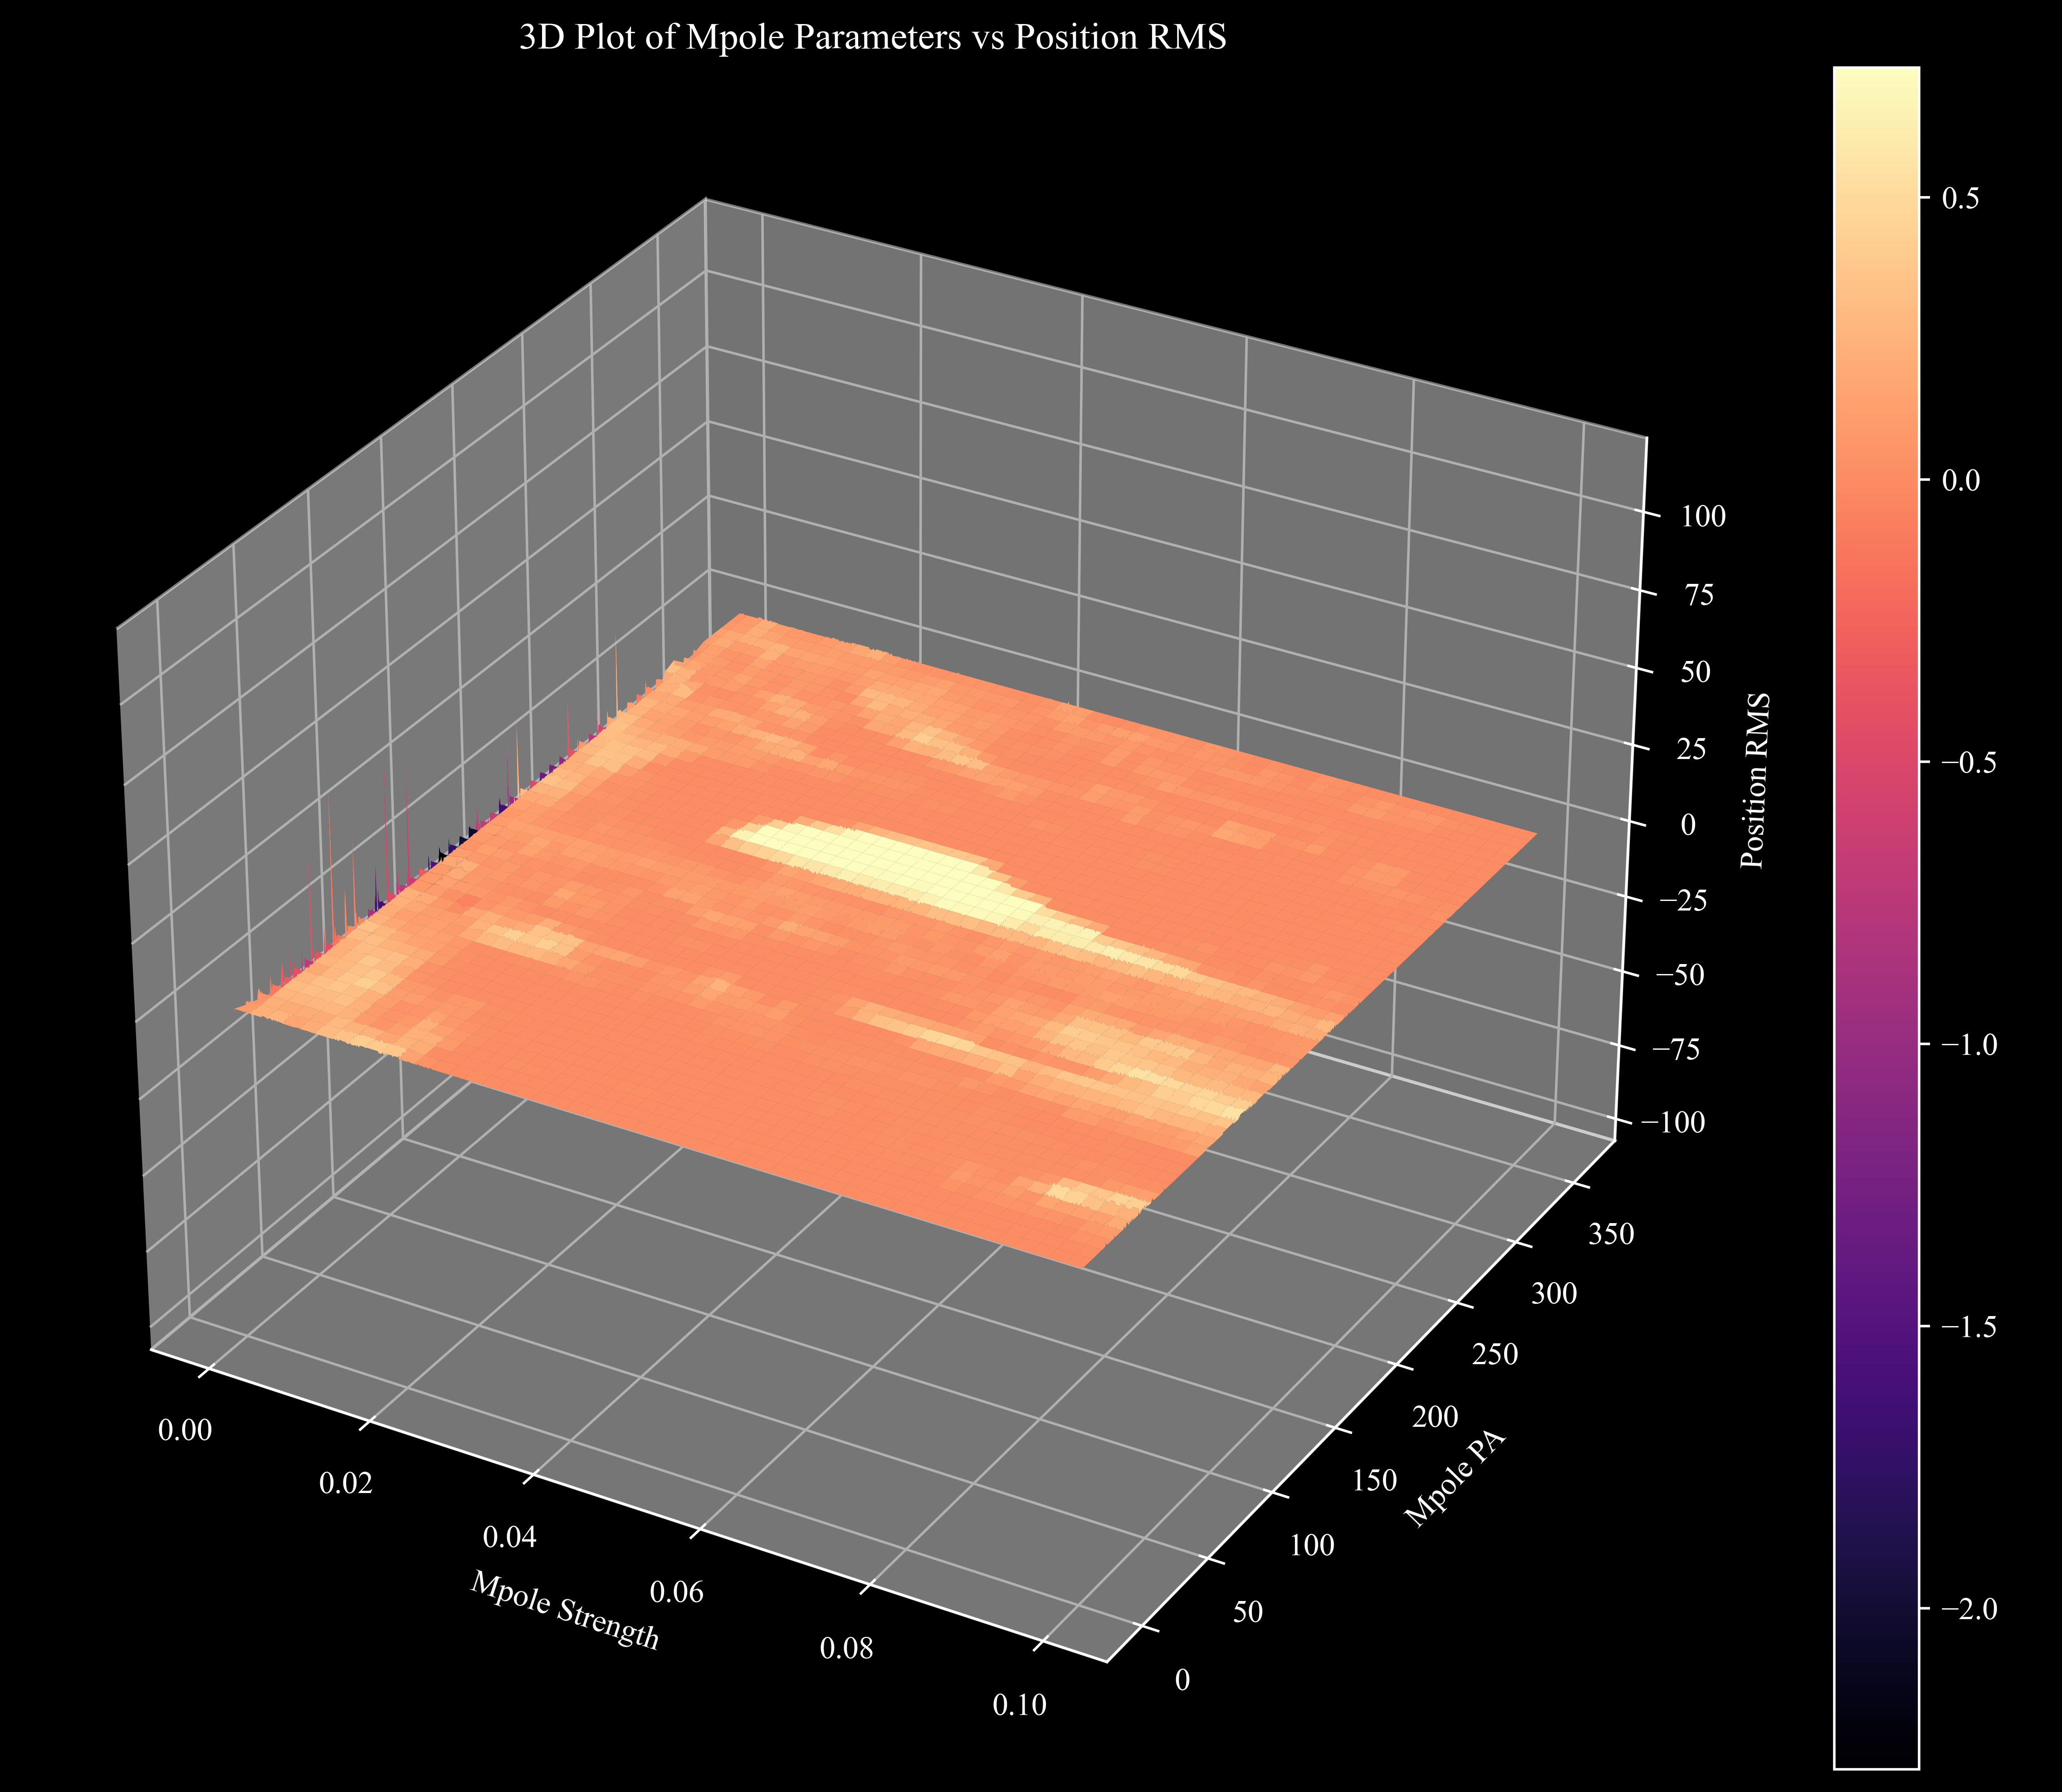

In [5]:
from scipy.interpolate import griddata

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of x and y values
x = df['t_mpole_str'].values
y = df['t_mpole_pa'].values
z = df['pos_rms'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 1000)
yi = np.linspace(y.min(), y.max(), 1000)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot surface
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=1)

# Plot scattered points
scatter = ax.scatter(x, y, z, c=z, cmap='magma', alpha=0)

ax.set_xlabel('Mpole Strength', color = 'w')
ax.set_ylabel('Mpole PA', color = 'w')
ax.set_zlabel('Position RMS', color = 'w')

fig.colorbar(surf, label='Position RMS', ax=ax)
plt.title('3D Plot of Mpole Parameters vs Position RMS', color = 'w')
plt.tight_layout()
plt.show()

In [ ]:
# Create a grid of x and y values
x = df['t_mpole_str'].values
y = df['t_mpole_pa'].values
z = df['pos_rms'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 1000)
yi = np.linspace(y.min(), y.max(), 1000)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Create the 3D surface plot with log colorscale
fig = go.Figure(data=[
    go.Surface(
        x=xi, 
        y=yi, 
        z=zi, 
        colorscale='magma',
        colorbar=dict(title='Position RMS (log scale)'),
        surfacecolor=np.log10(np.maximum(zi, 1e-10))  # Apply log10 transform, avoiding negative values
    ),
])

# Update layout with black background and adjusted colors
fig.update_layout(
    template='plotly_dark',
    title={
        'text': 'Mpole Strength and PA Parameter Space (Log Scale)',
        'font': {'color': 'white'}
    },
    scene=dict(
        xaxis=dict(
            title='Mpole Strength',
            range=[df['t_mpole_str'].min(), df['t_mpole_str'].max()],
            gridcolor='gray',
            showbackground=True,
            backgroundcolor='black'
        ),
        yaxis=dict(
            title='Mpole PA',
            range=[df['t_mpole_pa'].min(), df['t_mpole_pa'].max()],
            gridcolor='gray',
            showbackground=True,
            backgroundcolor='black'
        ),
        zaxis=dict(
            title='Position RMS',
            gridcolor='gray',
            showbackground=True,
            backgroundcolor='black'
        ),
        aspectmode='manual',
        aspectratio=dict(x=2, y=1, z=1),
        bgcolor='black'
    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    width=1000,
    height=800
)

fig.show()
